In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [4]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 432x288 with 0 Axes>

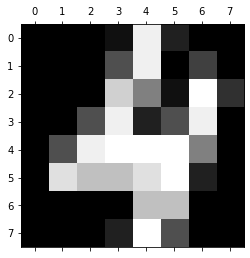

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1001])
plt.show()

# KNN

In [199]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [200]:
vectors = np.array(vectors)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [202]:
X_train.shape

(4800, 784)

In [203]:
X_test.shape

(1200, 784)

In [204]:
def predict(test_point, X_train, y_train, k):
    distances = ((X_train - test_point) ** 2).sum(axis=1)
    indices = distances.argsort()[:k]
    classes = y_train[indices[0]]
    unique, counts = np.unique(classes, return_counts=True)
    closest_class = unique[np.argmax(counts)]
    return closest_class



In [205]:
def test():
    success = 0
    examples = X_test
    for e in range(len(examples)):
        z = predict(examples[e])
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)

In [206]:
test_point = np.random.randint(255, size=(4800, 784))
predict(test_point,X_train,y_train,3)

'9'

## Prostate

In [62]:
import pandas as pd

In [145]:
prostate_data = pd.read_csv('prostate.csv')

In [146]:
#Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.
import pandas as pd
import numpy as np

# Convierte los datos a matrices NumPy
X = prostate_data.values[:, 0:8]
y = prostate_data.values[:, 8]

# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perceptron

In [153]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [154]:
def train(target_char, opposite_char, steps, eta=0.1):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(train_data[0]['vector'].shape)
    weights = w
    for _ in range(steps):
        for e in train_data:
            x = e['vector']
            y = e['char']
            z = np.dot(x, w)
            if z >= 0 and y == opposite_char:
                w = w - eta * x
            elif z < 0 and y == target_char:
                w = w + eta * x
    return w


def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

In [155]:
weights = train('1','2',100)

In [156]:
test('1','2',weights)

0.9800995024875622